### Load the Commit Statistics

In [1]:
project_root_path = '../../..'

import sys
lib_path = project_root_path + "/jupyter/lib/"
sys.path.append(lib_path)

import commit_stat_engineering
import json

dataset_dir = project_root_path + '/data/github/2022-04-07-marine-search'
project_stats_dir = dataset_dir + '/projects'
find_args = 'commit-stat.log.json', project_stats_dir
all_commit_logs = commit_stat_engineering.find_files(*find_args)
all_stats = commit_stat_engineering.get_stats_for_all_commits(all_commit_logs)

### Load the Manual Labels
commit_labelling.csv is a manual labelling of 160 commits, done with an assist from the output of the clustering notebook.

In [2]:
import pandas as pd

labeling_path = project_root_path + '/sandbox/data/bob/commit_labeling.csv'
data_df = pd.read_csv(labeling_path, sep='\t', index_col=0)
data_df

,wtf,commit_type,cluster,binFiles,textFiles,textLines,javascriptLinePct,rustLinePct,markdownLinePct,jsonLinePct,imgFiles,lockLinePct,yarnLinePct,htmlLinePct
12074a45bc9b22dfffbf433bb73dde6aad88e2be,0,minor_commit,7,0,0,0,0.00,0.0,0.00,0.00,2,0.00,0.0,0.00
e190bc9dcda78b5688b25154c1eb6e2e1febfd1c,0,minor_commit,7,0,0,0,0.00,0.0,0.00,0.00,0,0.00,0.0,0.00
e4807d4413c12c4b9a4600736ebd3642a8e8b2ce,0,minor_commit,7,1,0,0,0.00,0.0,0.00,0.00,1,0.00,0.0,0.00
5b1f6608a3ae88026b9f2bf317a80287f382e9b7,0,minor_commit,7,0,1,1,100.00,0.0,0.00,0.00,0,0.00,0.0,0.00
dabe94da0d22f41a555012e6ec4ef689a8c1c6e6,0,minor_commit,7,0,1,1,100.00,0.0,0.00,0.00,0,0.00,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
768edfc7eb1bd020830f211265da9848de339b3d,0,big_json,2,0,13,10912,5.26,0.0,0.00,78.36,2,15.25,0.0,0.00
e8e033de75164a99af30c3ab997fb6b028a6ab75,0,big_json,2,0,6,13251,0.35,0.0,0.00,99.64,0,0.00,0.0,0.00
c991d0d153f6c7d3f94767359043e93cd2136ea0,0,big_json,2,0,23,16797,2.45,0.0,0.08,97.27,0,0.00,0.0,0.00
f815a4764ab1946106baea984a20fa423e79a8f3,0,big_json,2,3,16,20429,1.20,0.0,0.09,97.56,2,0.00,0.0,0.91


### Link Manual Labels to Feature Stats

In [3]:
import numpy as np

features = ['binFiles','textFiles','textLines','javascriptLines','rustLines',
            'lockLines','htmlLines','jsonLines','markdownLines','imgFiles','yarnLines']

def make_feature_vector(commit_stats):
    return [np.log1p(commit_stats[feature]) for feature in features]

all_commit_stats = {}
for commit_stats in all_stats:
    commit_id = commit_stats['commit']
    all_commit_stats[commit_id] = commit_stats

X = []
y = []
for commit_id, labelling_spreadsheet_row in data_df.iterrows():
    commit_stats = all_commit_stats[commit_id]
    feature_vector = make_feature_vector(commit_stats)
    X.append(feature_vector)
    y.append(labelling_spreadsheet_row[1])

### Neural Network Classifier
Multilayer Perceptrons are cool. They are neural networks with hidden layers that identify subtle patterns in data across multiple input features. Think about looking at multiple pixels in an image simultaneously to recognize a shape, like a wheel. That is the kind of problem at which neural networks justify their high training cost.

This is not that kind of problem. But NNs are fun, so I'm training one anyway. :)

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

random_state = 0
split = train_test_split(X, y, test_size=0.33, random_state=random_state)
X_train, X_test, y_train, y_test = split
clf = MLPClassifier(solver='lbfgs', alpha=1e-3,
                    hidden_layer_sizes=(20,20,20,20),
                    random_state=random_state, max_iter=10000)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
y_pred = clf.predict(X)
print('Score: ' + str(score))

Score: 0.8301886792452831


### Reliable Workhorse Classifier
If MLPs are the awesome hotness of ML algorithms, Linear Regression and it's classifier sibling, Logistic Regression (sometimes abbreviated as Logit), are the reliable workhorses. Even in data science projects that end with a more advanced classifier, Logit is frequently used to give a baseline score during early analysis.

In cases like we have here, with independent features that are mostly correlated to one or two classes, LogisticRegression gets a good answer with a lot less compute.

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

random_state = 0
split = train_test_split(X, y, test_size=0.33, random_state=random_state)
X_train, X_test, y_train, y_test = split
clf = LogisticRegression(random_state=random_state, max_iter=10000)
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
y_pred = clf.predict(X_test)
print('Score: ' + str(score))

Score: 0.8679245283018868


### Confusion Matrix
Each row of a confusion matrix shows statistics about one of the target classes. The values in the columns show the number of times that the classifier thought a commit of that type was something else.

In [6]:
from sklearn.metrics import confusion_matrix
target_names = list(set(y))
y_test_numeric = [target_names.index(prediction) for prediction in y_test]
y_pred_numeric = [target_names.index(prediction) for prediction in y_pred]
confusion_mx = confusion_matrix(y_test_numeric, y_pred_numeric)
print(target_names)
confusion_mx

['minor_commit', 'interface_development', 'documentation', 'javascript_development', 'rust_development', 'rust_packaging', 'bulk_commit', 'big_json']


array([[ 4,  0,  0,  0,  1,  0,  0,  0],
       [ 0,  5,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 10,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  5,  0,  0,  1,  0],
       [ 1,  0,  0,  0,  3,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  4,  0,  0],
       [ 0,  0,  0,  0,  1,  1,  9,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  6]])

### Beautiful Confusion
The numbers are fine if you want something that can be sent over telex, but we can make it a bit prettier.

actuals on the left, predicteds on the bottom


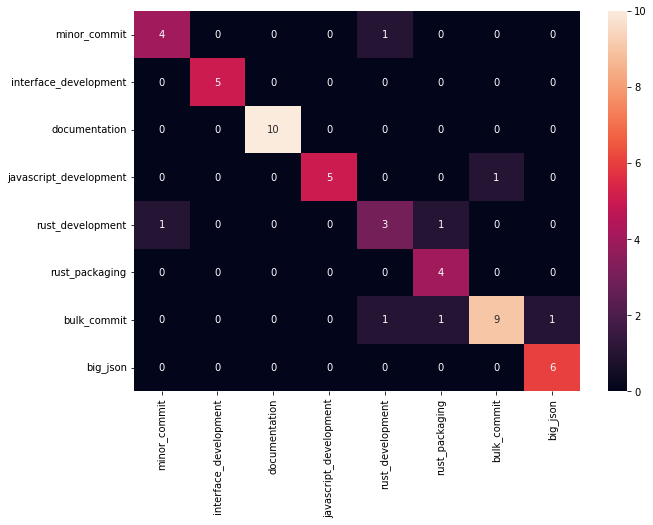

In [7]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
confusion_df = pd.DataFrame(confusion_mx, index = target_names, columns = target_names)
plt.figure(figsize = (10,7))
sn.heatmap(confusion_df, annot=True)
print("actuals on the left, predicteds on the bottom")
plt.show()